In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from datasets import load_dataset


dataset_path = r"/content/drive/MyDrive/Capstone (Shared)/Images_3k_processed"
dataset = load_dataset(dataset_path)

Resolving data files:   0%|          | 0/5757 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/1440 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
test_ds, train_ds = dataset['test'], dataset['train']

In [ ]:
test_ds

Dataset({
    features: ['image', 'text'],
    num_rows: 1439
})

In [ ]:
train_ds

Dataset({
    features: ['image', 'text'],
    num_rows: 5756
})

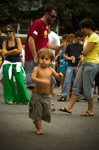

In [ ]:
example = train_ds[0]
image = example["image"]
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

In [ ]:
example['text']

'the shirtless little boy is walking around adults'

#### Creating PyTorch Dataset

In [ ]:
from torch.utils.data import Dataset

class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        encoding = self.processor(images=item["image"], text=item["text"], padding="max_length", return_tensors="pt")
        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}
        return encoding

In [ ]:
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained("microsoft/git-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
train_dataset = ImageCaptioningDataset(train_ds, processor)
test_dataset = ImageCaptioningDataset(test_ds,processor)

In [ ]:
item = train_dataset[0]
for k,v in item.items(): print(k,v.shape)

input_ids torch.Size([512])
attention_mask torch.Size([512])
pixel_values torch.Size([3, 224, 224])


### Create a Pytorch DataLoader

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=16)   # increased with 2

In [ ]:
batch = next(iter(train_dataloader))
for k,v in batch.items(): print(k,v.shape)

input_ids torch.Size([2, 512])
attention_mask torch.Size([2, 512])
pixel_values torch.Size([2, 3, 224, 224])


Lets check one batch and do some sanity checks

In [ ]:
processor.decode(batch["input_ids"][0])

'[CLS] a recently adopted mixed breed medium sized dog bounds happily around the yard [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [P

We can denormalize the values to get back an image

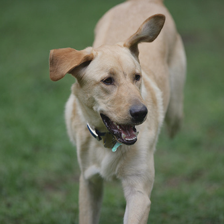

In [ ]:
from PIL import Image
import numpy as np
MEAN = np.array([123.675, 116.280, 103.530]) / 255
STD = np.array([58.395, 57.120, 57.375]) / 255
unnormalized_image = (batch["pixel_values"][0].numpy() * np.array(STD)[:, None, None]) + np.array(MEAN)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
Image.fromarray(unnormalized_image)

### Defining the Model

change the model according to your needs

In [ ]:
from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base")

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

Dummy forward pass

Checking initial loss on a batch

In [ ]:
outputs = model(input_ids=batch["input_ids"], attention_mask=batch["attention_mask"], pixel_values=batch["pixel_values"], labels=batch["input_ids"])
outputs.loss

tensor(11.9579, grad_fn=<NllLossBackward0>)

## Train the model

Training the model using native pytorch here

In [ ]:
import torch
# first run the code with attention_mask commented and after your recieve a warning for adding attention mask --> uncomment the 'attention_mask' line and run the program again
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.train()
for epoch in range(5):
    print("Epoch:", epoch)
    for idx, batch in enumerate(train_dataloader):
        input_ids = batch.pop("input_ids").to(device)
        pixel_values = batch.pop("pixel_values").to(device)
        #attention_mask = batch.pop("attention_mask").to(device)  # added -- attention masking    # comment and uncomment
        outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=input_ids)
        loss = outputs.loss
        print("Loss:", loss.item() , "current epoch " , epoch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

Epoch: 0


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Loss: 12.647239685058594
Loss: 10.689804077148438
Loss: 10.133136749267578
Loss: 9.795063018798828
Loss: 9.624971389770508
Loss: 9.456159591674805
Loss: 9.163751602172852
Loss: 8.981927871704102
Loss: 8.832569122314453
Loss: 8.65771770477295
Loss: 8.507758140563965
Loss: 8.438976287841797
Loss: 8.310027122497559
Loss: 8.242500305175781
Loss: 8.060932159423828
Loss: 8.008020401000977
Loss: 7.893003940582275
Loss: 7.825217247009277
Loss: 7.6926469802856445
Loss: 7.621405124664307
Loss: 7.513848304748535
Loss: 7.404517650604248
Loss: 7.3080668449401855
Loss: 7.186076641082764
Loss: 7.1323347091674805
Loss: 6.9905686378479
Loss: 6.931778430938721
Loss: 6.778956413269043
Loss: 6.681426048278809
Loss: 6.607203006744385
Loss: 6.496428966522217
Loss: 6.394723415374756
Loss: 6.267309188842773
Loss: 6.189449787139893
Loss: 6.055187702178955
Loss: 5.956337928771973
Loss: 5.844051837921143
Loss: 5.764474391937256
Loss: 5.672382354736328
Loss: 5.510925769805908
Loss: 5.420023441314697
Loss: 5.31909

KeyboardInterrupt: 

# Inference

### Now that we have trained the model, lets load the image and perform inference on it

In [ ]:
# load image
example = dataset['train'][3]
image = example["image"]
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

In [ ]:
# prepare image for the model
inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values
generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

In [ ]:
# saving the entire model
torch.save(model.state_dict(), "finetuned_model")

# saving the optimizer state
torch.save(optimizer.state_dict(), "optimizer_state")

#### Inference from the saved model

Loading the saved model

In [ ]:
# Load the saved model and optimizer
loaded_model = AutoModelForCausalLM.from_pretrained("microsoft/git-base")
loaded_optimizer = torch.optim.AdamW(loaded_model.parameters(), lr=5e-5)

# Load the saved model and optimizer state
loaded_model.load_state_dict(torch.load('finetuned_model'))
loaded_optimizer.load_state_dict(torch.load('optimizer_state'))

# Set the model to evaluation mode for inference
loaded_model.eval()

# Process the New Image
loaded_model.to(device)

In [ ]:
example = dataset['test'][20]
image = example["image"]
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

# generate the samples
inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values
generated_ids = loaded_model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

In [ ]:
example = dataset['test'][25]
image = example["image"]
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

# generate the samples
inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values
generated_ids = loaded_model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

In [ ]:
example = dataset['test'][76]
image = example["image"]
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

# generate the samples
inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values
generated_ids = loaded_model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)